In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 



In [2]:
file_path = "./Desktop/datasets/movies.data"

In [3]:
columns_names = ["user_id", "item_id", "rating", "timestamp"]
data = pd.read_csv(file_path, sep = "\t", names = columns_names)

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv("./Desktop/datasets/Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#merging the data set 
df = pd.merge(data, movie_titles, on = "item_id")

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
#EDA 

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("dark")
%matplotlib inline

In [13]:
df.groupby("title")["rating"].mean().sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [15]:
df.groupby("title")["rating"].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [18]:
ratings["number_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [23]:
ratings.sort_values(ascending = False, by = ["number_of_ratings", "rating"])

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Very Natural Thing, A (1974)",1.000000,1
"Vie est belle, La (Life is Rosey) (1987)",1.000000,1
Wend Kuuni (God's Gift) (1982),1.000000,1


<AxesSubplot: title={'center': 'count ratings to number of movies'}, xlabel='count_ratings', ylabel='number of movies'>

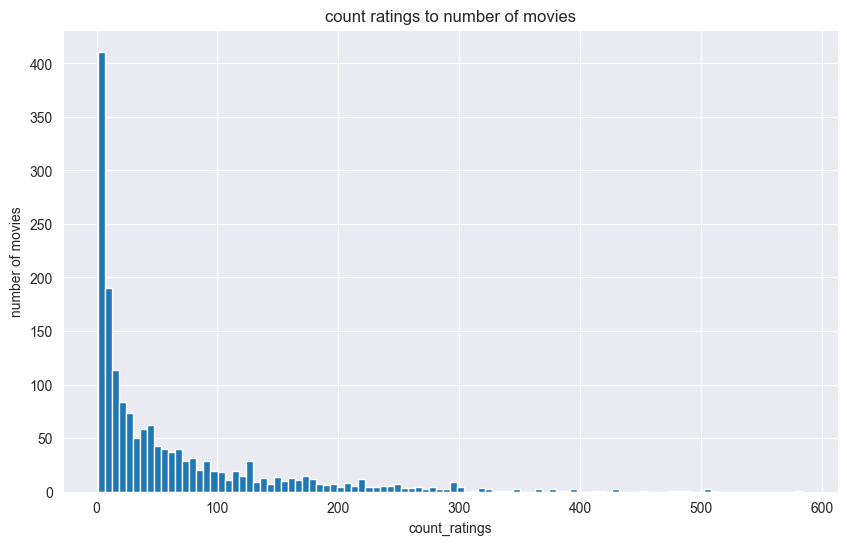

In [30]:
plt.figure(figsize = (10, 6))
plt.xlabel("count_ratings")
plt.ylabel("number of movies")
plt.title("count ratings to number of movies")
ratings["number_of_ratings"].hist(bins = 100)

<AxesSubplot: title={'center': 'Rating to Ratings Count'}, xlabel='rating', ylabel='ratings count'>

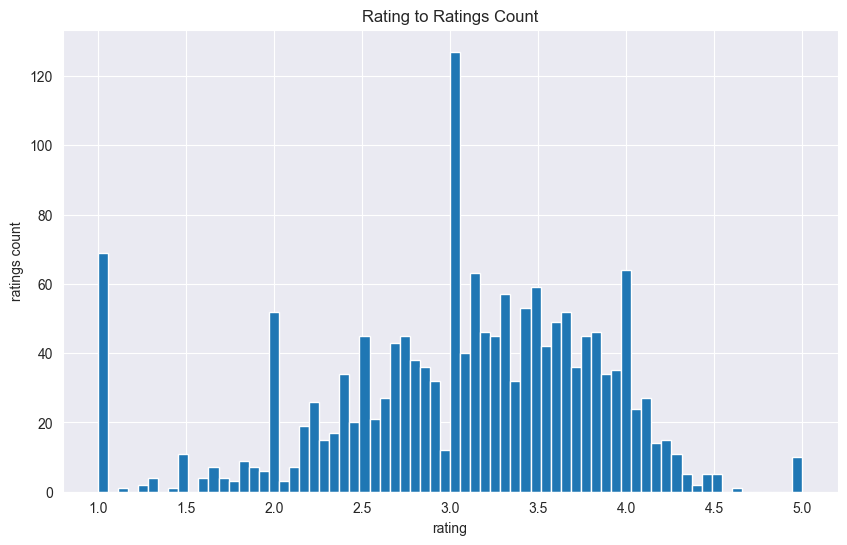

In [31]:
plt.figure(figsize = (10, 6))
plt.xlabel("rating")
plt.ylabel("ratings count")
plt.title("Rating to Ratings Count")
ratings["rating"].hist(bins = 70)

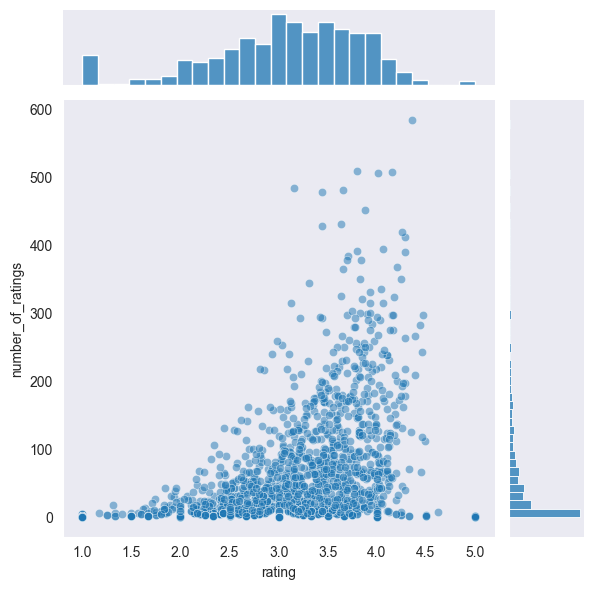

In [33]:
sns.jointplot(x = "rating", y = "number_of_ratings", data = ratings, alpha = 0.5)

In [34]:
moviemat = df.pivot_table(index = "user_id", columns = "title", values = "rating")


In [35]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ratings.sort_values(by = "number_of_ratings", ascending = False)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [39]:
starwars_user_ratings = moviemat["Star Wars (1977)"]
liarliar_user_ratings = moviemat["Liar Liar (1997)"]

starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [40]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-

In [41]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ["Correlation"])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [42]:
corr_starwars.sort_values("Correlation", ascending = False).head(10)

,Correlation
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0


In [43]:
corr_starwars = corr_starwars.join(ratings["number_of_ratings"])

In [44]:
corr_starwars

,Correlation,number_of_ratings
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [46]:
recommended = corr_starwars[corr_starwars["number_of_ratings"] > 100].sort_values("Correlation", ascending = False)[1:5]

In [58]:
# here the recommended movies will be the next 5 
recommended = recommended.rename_axis("title")



In [79]:
print("If you are a fan of Star Wars, you should like :")
print(recommended)
for i in range(1, len(recommended)):
    print(recommended.iloc[i]["title"])
#     print("{:20s |}".format(recommended.iloc[i]))

If you are a fan of Star Wars, you should like :
                                                    Correlation  \
title                                                             
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    number_of_ratings  
title                                                                  
Empire Strikes Back, The (1980)                                   368  
Return of the Jedi (1983)                                         507  
Raiders of the Lost Ark (1981)                                    420  
Austin Powers: International Man of Mystery (1997)                130  


KeyError: 'title'

In [65]:
recommended.head()

,Correlation,number_of_ratings
title,,
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [80]:
print(recommended.iloc[0]["title"])

KeyError: 'title'